<a href="https://colab.research.google.com/github/Worachet-Ch/project2022/blob/main/random_nan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #นำเข้า pandas แทนที่ด้วย pd
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
import missingno as msno
from sklearn import linear_model
%matplotlib inline
import matplotlib
import sklearn 
from sklearn.impute import KNNImputer

In [33]:
import pandas as pd
import os
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/project' #เข้า drive
data_file_path = os.path.join(path,'dataset2.csv') #ไปที่ไฟล์ confirmed-cases-since-280265.csv
data = pd.read_csv(data_file_path) #อ่านไฟล์ csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
data

,No.,LabNo,Sex,AgeSYear,Enose,Overall,Body shape age,Kidney,Heart,Liver,...,071_HbA1c,CK,LD-P,AMY7,TP1,DBIL,TBIL,ALB1,GGT,homocysteine
0,1.0,NaN,2,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.8,79.0,231.0,59.0,7.16,0.10,0.30,4.48,11.0,10.88
1,2.0,201807163166.00,1,49.0,NaN,1.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.11
2,3.0,201807163167,1,44.0,NaN,NaN,NaN,NaN,NaN,NaN,...,4.6,85.0,175.0,104.0,7.43,0.15,1.26,4.70,15.0,11.94
3,4.0,201807163168,2,37.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.01
4,5.0,201807163169,2,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,5.4,57.0,177.0,89.0,7.11,0.02,0.20,3.92,24.0,8.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2269,NaN,V17,2,31.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2270,NaN,V19,2,32.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2271,NaN,V20,1,28.0,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2272,NaN,V21,1,29.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data = data.dropna(subset=['telomere length (kb) '])

In [36]:
data=data.drop(['No.', 'LabNo','DHEAs (BRIA)'], axis=1)

In [37]:
data=data.drop(data.columns[2: 10], axis=1)

In [38]:
data=data.drop(data.columns[27:37], axis=1)

In [39]:
data.isna().sum()

Sex                          0
AgeSYear                     0
telomere length (kb)         0
Weight                       8
Height                       8
BMI                          8
Systolic                     8
Diastolic                    9
HeartRate                   51
SMM                        225
Fat Mass                   225
% Body fat                 225
waist to hip radio         225
abdominal circumference    226
visceral fat area          225
001_Glucose                  1
002_BUN                      0
003_Creatinine               0
004_Uric Acid               93
005_Cholesterol              0
006_Triglyceride             0
008_HDL-C                    0
009_LDL                      0
010_AST                      0
012_ALT                      1
013_Alkaline Phos           29
071_HbA1c                  167
dtype: int64

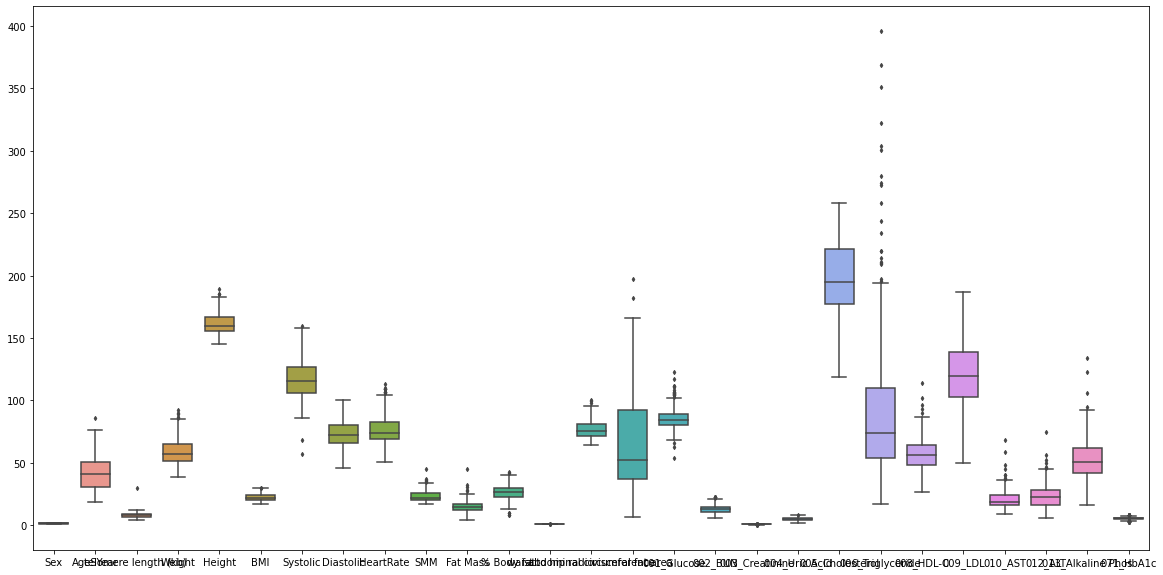

In [40]:
matplotlib.rcParams['figure.figsize'] = 20, 10
sns.boxplot(data=data, fliersize=3, width=0.7)

In [41]:
''' Detection '''
# IQR
Q1 = np.percentile(data['telomere length (kb) '], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data['telomere length (kb) '], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", data.shape)
 
# Upper bound
upper = np.where(data['telomere length (kb) '] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(data['telomere length (kb) '] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
data.drop(upper[0], inplace = True)
data.drop(lower[0], inplace = True)
 
print("New Shape: ", data.shape)

Old Shape:  (423, 27)
New Shape:  (422, 27)


In [42]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
49,2,58.0,7.30,47.2,156.0,19.4,112.0,64.0,70.0,NaN,...,0.6,4.8,180.0,97.0,62.0,98.0,25.0,32.0,40.0,5.8
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,19.3,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,21.3,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,21.6,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
107,2,86.0,4.55,49.0,154.0,20.7,129.0,79.0,83.0,NaN,...,0.7,5.4,183.0,86.0,39.0,127.0,12.0,22.0,82.0,6.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,2,25.0,8.98,47.0,165.0,17.3,104.0,63.0,89.0,NaN,...,0.6,4.8,232.0,36.0,96.0,128.0,18.0,12.0,46.0,NaN
2269,2,31.0,8.23,72.2,168.0,25.6,123.0,89.0,69.0,NaN,...,0.6,6.1,187.0,49.0,51.0,127.0,21.0,24.0,71.0,NaN
2270,2,32.0,8.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,5.1,222.0,58.0,79.0,132.0,17.0,10.0,34.0,NaN
2272,1,29.0,8.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,6.8,140.0,92.0,48.0,73.0,31.0,75.0,69.0,NaN


In [43]:
data.dropna(inplace = True)

In [44]:
data.isna().sum()

Sex                        0
AgeSYear                   0
telomere length (kb)       0
Weight                     0
Height                     0
BMI                        0
Systolic                   0
Diastolic                  0
HeartRate                  0
SMM                        0
Fat Mass                   0
% Body fat                 0
waist to hip radio         0
abdominal circumference    0
visceral fat area          0
001_Glucose                0
002_BUN                    0
003_Creatinine             0
004_Uric Acid              0
005_Cholesterol            0
006_Triglyceride           0
008_HDL-C                  0
009_LDL                    0
010_AST                    0
012_ALT                    0
013_Alkaline Phos          0
071_HbA1c                  0
dtype: int64

In [45]:
data

,Sex,AgeSYear,telomere length (kb),Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,...,003_Creatinine,004_Uric Acid,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST,012_ALT,013_Alkaline Phos,071_HbA1c
56,2,57.0,6.36,47.4,153.0,20.2,114.0,75.0,69.0,19.3,...,1.0,5.0,176.0,51.0,72.0,94.0,16.0,16.0,62.0,5.1
85,2,24.0,9.71,53.2,157.0,21.6,103.0,69.0,78.0,21.3,...,0.8,5.2,159.0,45.0,52.0,98.0,13.0,17.0,50.0,5.4
103,2,62.0,6.17,54.4,165.0,20.0,95.0,75.0,83.0,21.6,...,0.7,4.1,230.0,94.0,61.0,151.0,18.0,31.0,76.0,5.6
111,2,35.0,7.23,56.3,161.0,21.7,95.0,57.0,72.0,22.5,...,0.6,5.0,198.0,47.0,68.0,120.0,16.0,20.0,35.0,5.1
156,1,46.0,6.52,72.3,170.0,25.0,133.0,77.0,107.0,29.2,...,0.9,6.9,194.0,63.0,60.0,122.0,15.0,19.0,69.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,1,60.0,5.81,72.0,170.0,24.9,131.0,74.0,69.0,30.5,...,0.9,6.9,182.0,179.0,39.0,107.0,36.0,31.0,79.0,6.5
729,1,58.0,5.05,62.0,168.0,22.0,103.0,76.0,72.0,27.8,...,1.0,6.8,191.0,62.0,47.0,132.0,16.0,33.0,42.0,6.8
731,2,42.0,9.48,55.5,165.0,20.4,102.0,52.0,77.0,22.9,...,0.8,4.7,212.0,68.0,63.0,135.0,11.0,16.0,33.0,4.8
734,2,61.0,6.06,61.8,159.0,24.4,117.0,60.0,72.0,23.4,...,0.8,5.1,235.0,66.0,56.0,166.0,15.0,23.0,44.0,5.4


In [46]:
df = data.drop(['telomere length (kb) '], axis=1)

In [47]:
X = df.drop(['Sex', 'AgeSYear', '002_BUN', '003_Creatinine', '005_Cholesterol', '006_Triglyceride', '008_HDL-C', '009_LDL', '010_AST'], axis=1)

In [48]:
y= df.loc[:,['Sex', 'AgeSYear', '002_BUN', '003_Creatinine', '005_Cholesterol', '006_Triglyceride', '008_HDL-C', '009_LDL', '010_AST']]

In [49]:
X

,Weight,Height,BMI,Systolic,Diastolic,HeartRate,SMM,Fat Mass,% Body fat,waist to hip radio,abdominal circumference,visceral fat area,001_Glucose,004_Uric Acid,012_ALT,013_Alkaline Phos,071_HbA1c
56,47.4,153.0,20.2,114.0,75.0,69.0,19.3,12.5,26.4,0.80,70.6,43.0,81.0,5.0,16.0,62.0,5.1
85,53.2,157.0,21.6,103.0,69.0,78.0,21.3,14.6,27.4,0.77,73.8,39.0,79.0,5.2,17.0,50.0,5.4
103,54.4,165.0,20.0,95.0,75.0,83.0,21.6,15.2,27.9,0.83,73.8,7.0,89.0,4.1,31.0,76.0,5.6
111,56.3,161.0,21.7,95.0,57.0,72.0,22.5,15.4,27.4,0.78,74.0,42.0,84.0,5.0,20.0,35.0,5.1
156,72.3,170.0,25.0,133.0,77.0,107.0,29.2,19.0,26.4,0.93,91.4,136.0,78.0,6.9,19.0,69.0,5.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,72.0,170.0,24.9,131.0,74.0,69.0,30.5,13.8,20.1,0.93,84.0,109.0,92.0,6.9,31.0,79.0,6.5
729,62.0,168.0,22.0,103.0,76.0,72.0,27.8,11.9,19.2,0.92,81.3,101.0,102.0,6.8,33.0,42.0,6.8
731,55.5,165.0,20.4,102.0,52.0,77.0,22.9,14.1,25.4,0.77,72.5,37.0,81.0,4.7,16.0,33.0,4.8
734,61.8,159.0,24.4,117.0,60.0,72.0,23.4,19.2,31.1,0.84,78.5,72.0,83.0,5.1,23.0,44.0,5.4


In [50]:
y

,Sex,AgeSYear,002_BUN,003_Creatinine,005_Cholesterol,006_Triglyceride,008_HDL-C,009_LDL,010_AST
56,2,57.0,15.0,1.0,176.0,51.0,72.0,94.0,16.0
85,2,24.0,12.0,0.8,159.0,45.0,52.0,98.0,13.0
103,2,62.0,17.0,0.7,230.0,94.0,61.0,151.0,18.0
111,2,35.0,10.0,0.6,198.0,47.0,68.0,120.0,16.0
156,1,46.0,14.0,0.9,194.0,63.0,60.0,122.0,15.0
...,...,...,...,...,...,...,...,...,...
728,1,60.0,14.0,0.9,182.0,179.0,39.0,107.0,36.0
729,1,58.0,18.0,1.0,191.0,62.0,47.0,132.0,16.0
731,2,42.0,9.0,0.8,212.0,68.0,63.0,135.0,11.0
734,2,61.0,12.0,0.8,235.0,66.0,56.0,166.0,15.0


## Method 1: Using ravel() function

In [20]:
np.random.seed(123)
import numpy as np
import pandas as pd
 
# number of nan we want to add It will insert 3 nan values to the data.....
n = 15
 
# creating dataset
data1 = X['BMI']

# choosing random indexes to put NaN
index_nan = np.random.choice(data1.size, n, replace=False)
 
#adding nan to the data.
data1.ravel()[index_nan] = np.nan
df2 = data1
print(df2)

56     20.2
85     21.6
103    20.0
111    21.7
156    25.0
       ... 
728    24.9
729    22.0
731    20.4
734    24.4
739    20.4
Name: BMI, Length: 153, dtype: float64


### ทีละตัวแปร

In [22]:
np.random.seed(123)
import numpy as np
import pandas as pd
 
# number of nan we want to add It will insert 3 nan values to the data.....
n = 15
 
# creating dataset
dat1 = X['Weight']
dat2 = X['Height']
dat3 = X['BMI']
dat4 = X['Systolic']
dat5 = X['Diastolic']
dat6 = X['HeartRate']
dat7 = X['SMM']
dat8 = X['Fat Mass']
dat9 = X['% Body fat']
dat10 = X['waist to hip radio']
dat11 = X['abdominal circumference']
dat12 = X['visceral fat area']
dat13 = X['001_Glucose']
dat14 = X['004_Uric Acid']
dat15 = X['012_ALT']
dat16 = X['013_Alkaline Phos']
dat17 = X['071_HbA1c']

# choosing random indexes to put NaN
index_nan = np.random.choice(dat1.size, n, replace=False)
index_nan = np.random.choice(dat2.size, n, replace=False)
index_nan = np.random.choice(dat3.size, n, replace=False)
index_nan = np.random.choice(dat4.size, n, replace=False)
index_nan = np.random.choice(dat5.size, n, replace=False)
index_nan = np.random.choice(dat6.size, n, replace=False)
index_nan = np.random.choice(dat7.size, n, replace=False)
index_nan = np.random.choice(dat8.size, n, replace=False)
index_nan = np.random.choice(dat9.size, n, replace=False)
index_nan = np.random.choice(dat10.size, n, replace=False)
index_nan = np.random.choice(dat11.size, n, replace=False)
index_nan = np.random.choice(dat12.size, n, replace=False)
index_nan = np.random.choice(dat13.size, n, replace=False)
index_nan = np.random.choice(dat14.size, n, replace=False)
index_nan = np.random.choice(dat15.size, n, replace=False)
index_nan = np.random.choice(dat17.size, n, replace=False)

#adding nan to the data.
dat1.ravel()[index_nan] = np.nan
dat2.ravel()[index_nan] = np.nan
dat3.ravel()[index_nan] = np.nan
dat4.ravel()[index_nan] = np.nan
dat5.ravel()[index_nan] = np.nan
dat6.ravel()[index_nan] = np.nan
dat7.ravel()[index_nan] = np.nan
dat8.ravel()[index_nan] = np.nan
dat9.ravel()[index_nan] = np.nan
dat10.ravel()[index_nan] = np.nan
dat11.ravel()[index_nan] = np.nan
dat12.ravel()[index_nan] = np.nan
dat13.ravel()[index_nan] = np.nan
dat14.ravel()[index_nan] = np.nan
dat15.ravel()[index_nan] = np.nan
dat16.ravel()[index_nan] = np.nan
dat17.ravel()[index_nan] = np.nan


print(dat1 , dat2,dat3,dat4,dat5,dat6,dat7,dat8,dat9,dat10)

56     47.4
85     53.2
103    54.4
111    56.3
156    72.3
       ... 
728     NaN
729    62.0
731    55.5
734    61.8
739    58.2
Name: Weight, Length: 153, dtype: float64 56     153.0
85     157.0
103    165.0
111    161.0
156    170.0
       ...  
728      NaN
729    168.0
731    165.0
734    159.0
739    169.0
Name: Height, Length: 153, dtype: float64 56     20.2
85     21.6
103    20.0
111    21.7
156    25.0
       ... 
728     NaN
729    22.0
731    20.4
734    24.4
739    20.4
Name: BMI, Length: 153, dtype: float64 56     114.0
85     103.0
103     95.0
111     95.0
156    133.0
       ...  
728      NaN
729    103.0
731    102.0
734    117.0
739    108.0
Name: Systolic, Length: 153, dtype: float64 56     75.0
85     69.0
103    75.0
111    57.0
156    77.0
       ... 
728     NaN
729    76.0
731    52.0
734    60.0
739    69.0
Name: Diastolic, Length: 153, dtype: float64 56      69.0
85      78.0
103     83.0
111     72.0
156    107.0
       ...  
728      NaN
729     72.0
73

### for loop

In [85]:
np.random.seed(123)
n = 16
for i in X.columns:
  dt = X[i]
  index_nan = np.random.choice(dt.size, n, replace=False)

  dt.ravel()[index_nan] = np.nan
  print(dt)

56     47.4
85     53.2
103    54.4
111    56.3
156    72.3
       ... 
728    72.0
729    62.0
731    55.5
734    61.8
739    58.2
Name: Weight, Length: 153, dtype: float64
56     153.0
85     157.0
103      NaN
111    161.0
156    170.0
       ...  
728    170.0
729    168.0
731      NaN
734    159.0
739    169.0
Name: Height, Length: 153, dtype: float64
56     20.2
85     21.6
103    20.0
111    21.7
156     NaN
       ... 
728    24.9
729    22.0
731    20.4
734    24.4
739    20.4
Name: BMI, Length: 153, dtype: float64
56     114.0
85       NaN
103     95.0
111     95.0
156    133.0
       ...  
728    131.0
729    103.0
731    102.0
734    117.0
739      NaN
Name: Systolic, Length: 153, dtype: float64
56     75.0
85     69.0
103    75.0
111    57.0
156    77.0
       ... 
728     NaN
729     NaN
731    52.0
734    60.0
739    69.0
Name: Diastolic, Length: 153, dtype: float64
56      69.0
85      78.0
103     83.0
111     72.0
156    107.0
       ...  
728     69.0
729     72.0
73

In [86]:
np.random.seed(123)
n = 31
for i in X.columns:
  dt = X[i]
  index_nan = np.random.choice(dt.size, n, replace=False)

  dt.ravel()[index_nan] = np.nan
  print(dt)

56     47.4
85     53.2
103    54.4
111    56.3
156    72.3
       ... 
728    72.0
729    62.0
731    55.5
734    61.8
739    58.2
Name: Weight, Length: 153, dtype: float64
56     153.0
85     157.0
103      NaN
111    161.0
156    170.0
       ...  
728      NaN
729    168.0
731      NaN
734      NaN
739    169.0
Name: Height, Length: 153, dtype: float64
56     20.2
85     21.6
103    20.0
111    21.7
156     NaN
       ... 
728    24.9
729    22.0
731    20.4
734    24.4
739     NaN
Name: BMI, Length: 153, dtype: float64
56     114.0
85       NaN
103     95.0
111     95.0
156    133.0
       ...  
728    131.0
729    103.0
731    102.0
734    117.0
739      NaN
Name: Systolic, Length: 153, dtype: float64
56      NaN
85     69.0
103    75.0
111    57.0
156    77.0
       ... 
728     NaN
729     NaN
731    52.0
734    60.0
739    69.0
Name: Diastolic, Length: 153, dtype: float64
56      69.0
85      78.0
103     83.0
111     72.0
156    107.0
       ...  
728     69.0
729     72.0
73

In [87]:
np.random.seed(123)
n = 46
for i in X.columns:
  dt = X[i]
  index_nan = np.random.choice(dt.size, n, replace=False)

  dt.ravel()[index_nan] = np.nan
  print(dt)

56      NaN
85     53.2
103    54.4
111    56.3
156     NaN
       ... 
728    72.0
729    62.0
731    55.5
734    61.8
739    58.2
Name: Weight, Length: 153, dtype: float64
56       NaN
85     157.0
103      NaN
111    161.0
156    170.0
       ...  
728      NaN
729      NaN
731      NaN
734      NaN
739    169.0
Name: Height, Length: 153, dtype: float64
56     20.2
85     21.6
103    20.0
111    21.7
156     NaN
       ... 
728    24.9
729    22.0
731    20.4
734    24.4
739     NaN
Name: BMI, Length: 153, dtype: float64
56     114.0
85       NaN
103     95.0
111     95.0
156    133.0
       ...  
728    131.0
729      NaN
731    102.0
734    117.0
739      NaN
Name: Systolic, Length: 153, dtype: float64
56      NaN
85     69.0
103    75.0
111    57.0
156     NaN
       ... 
728     NaN
729     NaN
731    52.0
734    60.0
739    69.0
Name: Diastolic, Length: 153, dtype: float64
56       NaN
85      78.0
103      NaN
111      NaN
156    107.0
       ...  
728     69.0
729     72.0
73

In [88]:
np.random.seed(123)
n = 62
for i in X.columns:
  dt = X[i]
  index_nan = np.random.choice(dt.size, n, replace=False)

  dt.ravel()[index_nan] = np.nan
  print(dt)

56      NaN
85     53.2
103    54.4
111    56.3
156     NaN
       ... 
728     NaN
729    62.0
731    55.5
734    61.8
739     NaN
Name: Weight, Length: 153, dtype: float64
56       NaN
85     157.0
103      NaN
111    161.0
156    170.0
       ...  
728      NaN
729      NaN
731      NaN
734      NaN
739    169.0
Name: Height, Length: 153, dtype: float64
56     20.2
85     21.6
103    20.0
111    21.7
156     NaN
       ... 
728    24.9
729     NaN
731    20.4
734    24.4
739     NaN
Name: BMI, Length: 153, dtype: float64
56     114.0
85       NaN
103     95.0
111     95.0
156      NaN
       ...  
728    131.0
729      NaN
731    102.0
734      NaN
739      NaN
Name: Systolic, Length: 153, dtype: float64
56      NaN
85     69.0
103    75.0
111    57.0
156     NaN
       ... 
728     NaN
729     NaN
731    52.0
734    60.0
739    69.0
Name: Diastolic, Length: 153, dtype: float64
56       NaN
85      78.0
103      NaN
111      NaN
156    107.0
       ...  
728     69.0
729      NaN
73

In [89]:
np.random.seed(123)
n = 77
for i in X.columns:
  dt = X[i]
  index_nan = np.random.choice(dt.size, n, replace=False)

  dt.ravel()[index_nan] = np.nan
  print(dt)

56      NaN
85     53.2
103    54.4
111    56.3
156     NaN
       ... 
728     NaN
729     NaN
731    55.5
734    61.8
739     NaN
Name: Weight, Length: 153, dtype: float64
56       NaN
85     157.0
103      NaN
111    161.0
156    170.0
       ...  
728      NaN
729      NaN
731      NaN
734      NaN
739    169.0
Name: Height, Length: 153, dtype: float64
56      NaN
85     21.6
103    20.0
111    21.7
156     NaN
       ... 
728    24.9
729     NaN
731    20.4
734    24.4
739     NaN
Name: BMI, Length: 153, dtype: float64
56     114.0
85       NaN
103     95.0
111     95.0
156      NaN
       ...  
728    131.0
729      NaN
731    102.0
734      NaN
739      NaN
Name: Systolic, Length: 153, dtype: float64
56      NaN
85     69.0
103    75.0
111    57.0
156     NaN
       ... 
728     NaN
729     NaN
731    52.0
734    60.0
739    69.0
Name: Diastolic, Length: 153, dtype: float64
56       NaN
85      78.0
103      NaN
111      NaN
156    107.0
       ...  
728     69.0
729      NaN
73

In [ ]:
#np.random.seed(123)
#list1 = [16,31,46,62,77]
#for i, j in zip (X.columns, list1):
 #  

## Method 2: Creating mask 

In [23]:
np.random.seed(99)
mask = np.zeros(153*17, dtype=bool)
 
# marking first n indexes as true
mask[:100] = True
 
# shuffling the mask
np.random.shuffle(mask)
mask = mask.reshape(153, 17)
 
# applying mask to the data
X[mask] = np.nan
print(X)

     Weight  Height   BMI  Systolic  Diastolic  HeartRate   SMM  Fat Mass  \
56     47.4   153.0  20.2     114.0       75.0       69.0  19.3      12.5   
85     53.2   157.0  21.6     103.0       69.0       78.0  21.3      14.6   
103    54.4   165.0  20.0      95.0       75.0        NaN  21.6      15.2   
111    56.3   161.0  21.7      95.0       57.0       72.0  22.5      15.4   
156    72.3   170.0  25.0     133.0       77.0      107.0  29.2      19.0   
..      ...     ...   ...       ...        ...        ...   ...       ...   
728     NaN     NaN   NaN       NaN        NaN        NaN   NaN       NaN   
729    62.0     NaN  22.0     103.0       76.0       72.0  27.8      11.9   
731    55.5   165.0  20.4     102.0       52.0       77.0   NaN      14.1   
734    61.8   159.0  24.4     117.0       60.0       72.0  23.4      19.2   
739    58.2   169.0  20.4     108.0       69.0       73.0   NaN      13.0   

     % Body fat  waist to hip radio  abdominal circumference  \
56         